<a href="https://colab.research.google.com/github/tjdux/ML/blob/main/16_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2개의 층

In [1]:
# 데이터셋 불러오기
from tensorflow import keras

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 데이터 전처리
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28);
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

- 은닉층 (hidden layer): 입력층과 출력층 사이에 있는 모든 층
- 활성화 함수
  - 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
  - 출력층의 활성화 함수
    - 종류가 제한
    - 이진 분류: 시그모이드 함수 / 다중 분류: 소프트맥스 함수
    - 회귀를 위한 신경망의 출력층에서는 활성화 함수 사용 ❌
      - 분류 문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수 사용
      - 회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요 없음
      - 출력층의 선형 방정식 계산을 그대로 출력
  - 은닉층의 활성화 함수
    - 비교적 자유로움
    - 시그모이드 함수, 렐루 함수 등을 사용
    - 은닉층에서 활성화 함수를 사용하는 이유
      - 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 하기 위해
      - 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈
      - 선형 계산을 적당하고 비선형적으로 비틀어 주어야 함

In [3]:
# 시그모이드 활성화 함수를 사용한 은닉층
# 신경망 첫 번째 층은 input_shape 매개변수로 입력의 크기를 꼭 지정
dense1 = keras.layers.Dense(100, activation="sigmoid", input_shape=(784,))

# 소프트맥스 함수를 사용한 출력층
dense2 = keras.layers.Dense(10, activation="softmax")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 은닉층의 뉴런 개수를 정하는 데는 특별한 기준 없음
- 몇 개의 뉴런 개수를 두어야 할지 판단하기 위해서는 상당한 경험이 필요
- 적어도 출력층의 뉴런 개수보다는 많아야 함

## 심층 신경망 만들기

In [4]:
# 심층 신경망 (DNN) 만들기
# ⚠️ 출력층을 가장 마지막에!
# 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열
model = keras.Sequential([dense1, dense2])

- 인공 신경망의 강력한 성능: 층을 추가하여 입력 데이터에 연속적인 학습을 진행하는 능력

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수 출력
  - 층 이름: 층을 만들 때 name 매개변수로 지정 가능
  - 출력 크기 (Output Shape)
    - 첫 번째 차원은 샘플의 개수
      - fit() 메서드는 미니배치 경사 하강법을 사용
      - 기본 미니배치 크기는 32개이고 fit() 메서드의 batch_size 매개변수로 변경 가능
      - 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정
      - 배치 차원: 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원
    - 두 번째 차원은 뉴런의 개수
  - 모델 파라미터 개수
    - 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치 + 뉴런마다 1개의 절편
    - 첫 번째 층: 78,500 = 784 × 100 + 100
    - 두 번째 층: 1,101 = 100 × 10 + 10
  - Total params: 총 모델 파라미터 개수
  - Trainable params: 훈련되는 파라미터 개수
  - Non-trainable params: 훈련되지 않는 파라미터

## 층을 추가하는 다른 방법

### Sequential 클래스의 생성자 안에서 바로 Dense 클래스 객체 만들기

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784,),
                       name="hidden"),
    keras.layers.Dense(10, activation="softmax", name="output")
], name="패션 MNIST 모델")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 장점: 추가되는 층을 한 눈에 쉽게 알아볼 수 있음
- 단점
  - 아주 많은 층을 추가하려면 Sequential 클래스 생성자가 매우 길어짐
  - 조건에 따라 층을 추가할 수 없음

### add()

In [8]:
model = keras.Sequential()

model.add(keras.layers.Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 장점
  - 한눈에 추가되는 층을 볼 수 있음
  - 프로그램 실행 시 동적으로 층을 선택하여 추가 가능

In [11]:
# 모델 훈련
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7540 - loss: 0.7655
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8503 - loss: 0.4159
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8640 - loss: 0.3778
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8752 - loss: 0.3453
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8787 - loss: 0.3346


## 렐루 함수

- 초기 인공 신경망의 은닉층에 많이 사용된 활성화 함수는 시그모이드 함수
  - 단점
    - 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못함
    - 특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만듦

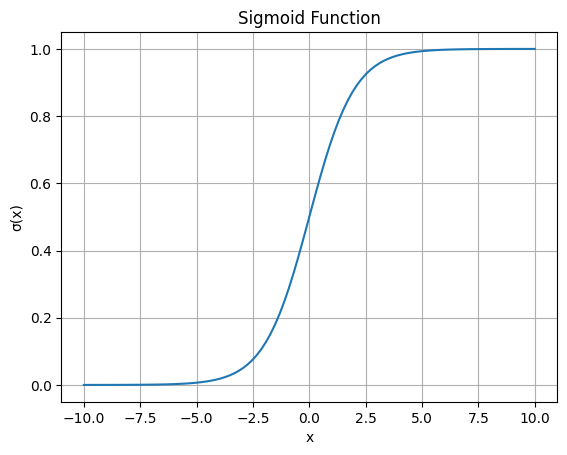

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# x값 범위 설정
x = np.linspace(-10, 10, 100)

# y값 계산
y = sigmoid(x)

# 그래프 그리기
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.show()

- 렐루 함수 (ReLU)
  - 시그모이드 함수의 문제점 개선
  - 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만듦
  - $$max(0, z)$$
    - $z$가 0보다 크면 $z$를 출력하고 0보다 작으면 0을 출력
  - 특히 이미지 처리에서 좋은 성능

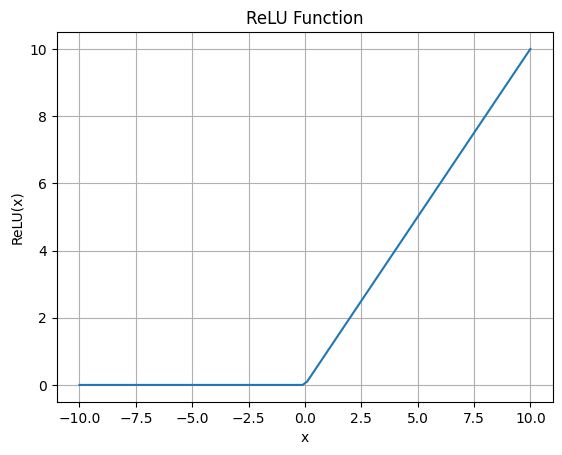

In [15]:
# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# x값 범위 설정
x = np.linspace(-10, 10, 100)

# y값 계산
y = relu(x)

# 그래프 그리기
plt.plot(x, y)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

### Flatten 층
- 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함
- 인공 신경망의 성능을 위해 기여하는 바는 없음
- 하지만 층처럼 입력층과 은닉층 사이에 추가하기 때문에 층이라고 부름
  - 입력층 바로 뒤에 추가
  - 하지만 신경망의 깊이에서는 제외: 학습하는 층이 아니니까!

In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- Flatten 클래스에 포함된 모델 파라미터는 0개
- Flatten 층을 추가하면 입력값의 차원을 짐작할 수 있는 것이 장점
- 입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나

In [18]:
# 훈련 데이터를 다시 준비하여 모델 훈련
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7659 - loss: 0.6774
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8579 - loss: 0.3955
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8708 - loss: 0.3601
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8826 - loss: 0.3325
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8867 - loss: 0.3158


In [20]:
# 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.3525


[0.3579033613204956, 0.8770833611488342]

## 옵티마이저
- 하이퍼파라미터: 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터
- 이번 장의 하이퍼파라미터
  - 추가할 은닉층의 개수
  - 은닉층의 뉴런 개수
  - 활성화 함수
  - 층의 종류
  - 미니배치 개수
  - epochs 매개변수
  - 옵티마이저
- 옵티마이저 (optimizer)
  - 케라스에서 제공하는 다양한 종류의 경사 하강법 알고리즘
  - compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop 사용
  - SGD
    - 가장 기본적인 옵티마이저
    - 1개의 샘플을 뽑아서 사용하지 않고 기본적으로 미니배치를 사용
    ```python
    model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    ```
    ```python
    sgd = keras.optimizers.SGD()
    model.compile(optimizer=sgd, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    ```
    ```python
    # 학습률 지정
    sgd = keras.optimizers.SGD(learning_rate=0.1)
    ```
  - 기본 경사 하강법 옵티마이저
    - 모두 SGD 클래스에서 제공
    - 모멘텀 최적화 (momentum optimization)
      - SGD 클래스의 momentum 매개변수를 0보다 큰 값으로 지정
      - 마치 이전의 그레이디언트를 가속도로 사용
      - 보통 momentum 매개변수는 0.9 이상을 지정
    - 네스테로프 모멘텀 최적화 (nesterov momentum optimization)
      - nesterov 매개변수를 True로 설정
      - 모멘텀 최적화를 2번 반복하여 구현
      - 대부분 기본 확률적 경사 하강법보다 더 나은 성능 제공
      ```python
      sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
      ```
  - 적응적 학습률 옵티마이저
    - 적응적 학습률 (adaptive learning rate)
      - 모델이 최적점에 가까이 갈수록 학습률이 낮출 수 있음
      - 안정적으로 최적점에 수렴할 가능성이 높음
      - 학습률 매개변수를 튜닝하는 수고를 덜 수 있음
    - RMSprop
      - optimizer 매개변수의 기본값
      ```python
      rmsprop = keras.optimizers.RMSprop()
      model.compile(optimizer=rmsprop, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
      ```
    - Adagrad
      ```python
      adagrad = keras.optimizers.Adagrad()
      model.compile(optimizer=adagrad, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
      ```
    - Adam
      - 모멘텀 최적화와 RMSprop의 장점을 접목
      - RMSprop와 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘

In [21]:
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
# optimizer를 adam으로 설정하고 훈련
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7660 - loss: 0.6762
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8543 - loss: 0.4132
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8692 - loss: 0.3609
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8807 - loss: 0.3281
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8868 - loss: 0.3089


In [23]:
# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3582


[0.3570826053619385, 0.8711666464805603]